# Broadband Fiber Analysis

In [139]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [305]:
# Load ACS city-level income data
acs_path = "US/ACSST5Y2023.S1903-Data.csv"  # adjust path if needed
acs_df = pd.read_csv(acs_path, low_memory=False)

# Load FCC broadband data
fcc_path = "bdc_us_fixed_broadband_summary_by_geography_D24_19jun2025.csv"
fcc_df = pd.read_csv(fcc_path, low_memory=False)

### Review Data Frames and EDA of FCC Data

In [306]:
fcc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623940 entries, 0 to 623939
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   area_data_type       623940 non-null  object 
 1   geography_type       623940 non-null  object 
 2   geography_id         623940 non-null  object 
 3   geography_desc       623940 non-null  object 
 4   geography_desc_full  623940 non-null  object 
 5   total_units          623940 non-null  int64  
 6   biz_res              623940 non-null  object 
 7   technology           623940 non-null  object 
 8   speed_02_02          623940 non-null  float64
 9   speed_10_1           623940 non-null  float64
 10  speed_25_3           623940 non-null  float64
 11  speed_100_20         623940 non-null  float64
 12  speed_250_25         623940 non-null  float64
 13  speed_1000_100       623940 non-null  float64
dtypes: float64(6), int64(1), object(7)
memory usage: 66.6+ MB


In [307]:
fcc_df.head(5)

,area_data_type,geography_type,geography_id,geography_desc,geography_desc_full,total_units,biz_res,technology,speed_02_02,speed_10_1,speed_25_3,speed_100_20,speed_250_25,speed_1000_100
0,Total,National,99,National,National,164620769,R,Any Technology,1.000000,1.000000,1.000000,0.999915,0.913686,0.591361
1,Total,National,99,National,National,164620769,B,Any Technology,1.000000,1.000000,1.000000,0.993139,0.746718,0.501438
2,Total,National,99,National,National,164620769,R,All Wired,0.942139,0.931779,0.918649,0.908108,0.898844,0.583384
3,Total,National,99,National,National,164620769,B,All Wired,0.829806,0.801533,0.775515,0.728355,0.711858,0.484445
4,Total,National,99,National,National,164620769,R,Any Terrestrial,0.979037,0.972038,0.964892,0.945353,0.913686,0.591361


In [308]:
# Filter FCC to county-level entries again if needed
fcc_county = fcc_df[fcc_df['geography_type'] == 'County'].copy()

In [309]:
# Set style
sns.set(style="whitegrid")

C:\Users\rbrio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


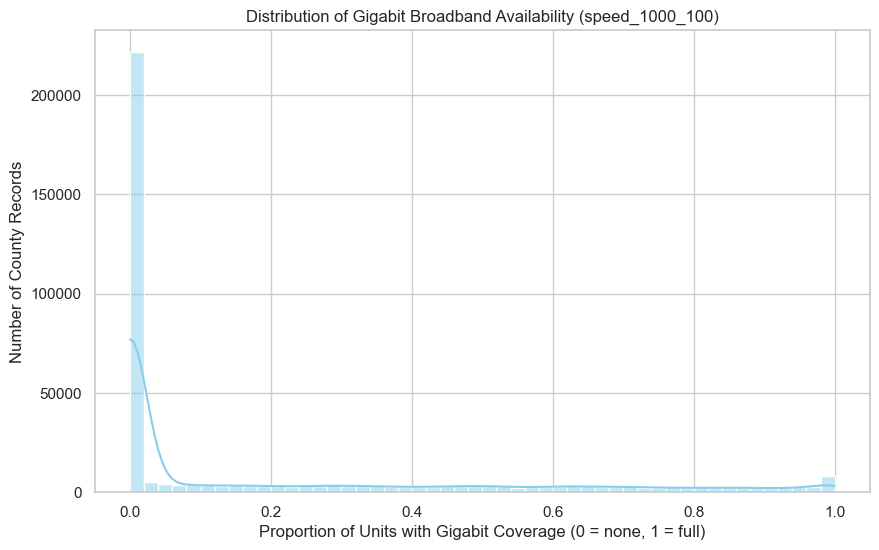

In [310]:
# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(fcc_county['speed_1000_100'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Gigabit Broadband Availability (speed_1000_100)')
plt.xlabel('Proportion of Units with Gigabit Coverage (0 = none, 1 = full)')
plt.ylabel('Number of County Records')
plt.show()

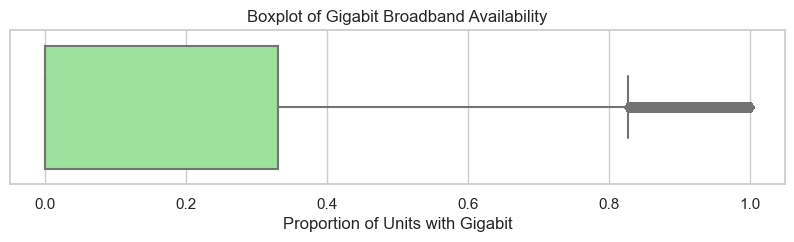

In [311]:
# Plot boxplot to show outliers and spread
plt.figure(figsize=(10, 2))
sns.boxplot(x=fcc_county['speed_1000_100'], color='lightgreen')
plt.title('Boxplot of Gigabit Broadband Availability')
plt.xlabel('Proportion of Units with Gigabit')
plt.show()

## Review ASC Data Frame and EDA of ACS Data

In [319]:
acs_df.shape

(3224, 243)

In [320]:
acs_df.head(5)

,GEO_ID,NAME,S1903_C01_001E,S1903_C01_001M,S1903_C01_002E,S1903_C01_002M,S1903_C01_003E,S1903_C01_003M,S1903_C01_004E,S1903_C01_004M,...,S1903_C03_036M,S1903_C03_037E,S1903_C03_037M,S1903_C03_038E,S1903_C03_038M,S1903_C03_039E,S1903_C03_039M,S1903_C03_040E,S1903_C03_040M,Unnamed: 242
0,Geography,Geographic Area Name,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND...,Margin of Error!!Number!!HOUSEHOLD INCOME BY R...,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND...,Margin of Error!!Number!!HOUSEHOLD INCOME BY R...,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND...,Margin of Error!!Number!!HOUSEHOLD INCOME BY R...,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND...,Margin of Error!!Number!!HOUSEHOLD INCOME BY R...,...,Margin of Error!!Median income (dollars)!!NONF...,Estimate!!Median income (dollars)!!NONFAMILY H...,Margin of Error!!Median income (dollars)!!NONF...,Estimate!!Median income (dollars)!!NONFAMILY H...,Margin of Error!!Median income (dollars)!!NONF...,Estimate!!Median income (dollars)!!NONFAMILY H...,Margin of Error!!Median income (dollars)!!NONF...,Estimate!!Median income (dollars)!!NONFAMILY H...,Margin of Error!!Median income (dollars)!!NONF...,NaN
1,0100000US,United States,127482865,208633,87717076,187768,15556942,20805,932199,7120,...,71,82142,317,54128,111,46229,104,91583,330,NaN
2,0500000US01001,"Autauga County, Alabama",22523,431,16901,415,4198,308,13,22,...,2660,45509,22483,48909,7421,43900,5962,88750,13713,NaN
3,0500000US01003,"Baldwin County, Alabama",94642,1316,81281,1245,7647,544,285,110,...,2415,66490,25264,50819,5602,42586,3460,85794,15009,NaN
4,0500000US01005,"Barbour County, Alabama",9080,315,4351,227,4091,293,20,20,...,2219,49583,28479,22796,7049,22566,7203,-,**,NaN


## Clean ASC Data

In [321]:
# Drop the first row (metadata)
acs_cleaned = acs_df[1:]

In [322]:
# Extract 5-digit county-level FIPS code from GEO_ID
# e.g., "0500000US01001" → "01001"
acs_df['geography_id'] = acs_df['GEO_ID'].str[-5:]

In [323]:
# Convert median income column (S1903_C01_001E) to numeric
acs_df['median_income_all'] = pd.to_numeric(acs_df['S1903_C01_001E'], errors='coerce')

In [324]:
# Select relevant columns only
acs_income_summary = acs_df[['geography_id', 'NAME', 'median_income_all']].copy()

In [365]:
# Remove very low or zero/negative income values
income_filtered = acs_income_summary[
    acs_income_summary['median_income_all'].notna() &
    (acs_income_summary['median_income_all'] > 10000) &
    (acs_income_summary['median_income_all'] < 750000)  # cap at $750k
]

### Visualizations of EDA

C:\Users\rbrio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


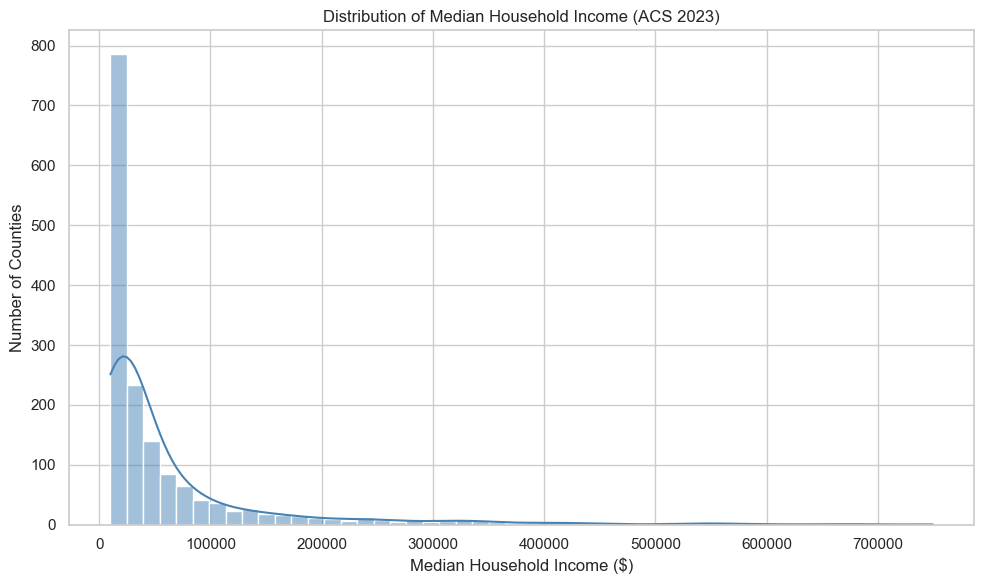

In [366]:
# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(income_filtered['median_income_all'], bins=50, kde=True, color='steelblue')
plt.title("Distribution of Median Household Income (ACS 2023)")
plt.xlabel("Median Household Income ($)")
plt.ylabel("Number of Counties")
plt.tight_layout()
plt.show()

To be clear, this is median income by county, not individual. Still kind of staggering. 

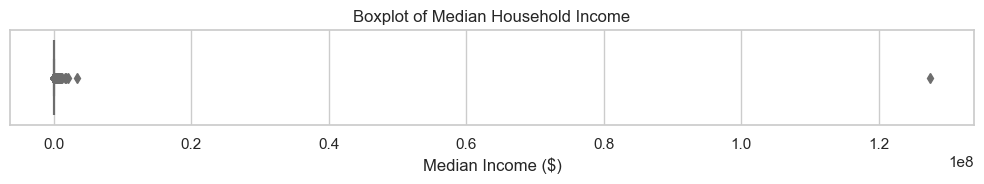

In [367]:
# Boxplot to show income spread and outliers
plt.figure(figsize=(10, 2))
sns.boxplot(x=acs_income_summary['median_income_all'], color='salmon')
plt.title("Boxplot of Median Household Income")
plt.xlabel("Median Income ($)")
plt.tight_layout()
plt.show()

In [327]:
# Summary statistics
print(acs_income_summary['median_income_all'].describe())

count    3.223000e+03
mean     7.949270e+04
std      2.248128e+06
min      1.700000e+01
25%      4.269000e+03
50%      1.021800e+04
75%      2.640450e+04
max      1.274829e+08
Name: median_income_all, dtype: float64


## Building Model Data

In [339]:
#  Filter to county-level rows only 
fcc_county = fcc_df[fcc_df['geography_type'] == 'County'].copy()

In [340]:
# Create binary target variable
# A county "has gigabit" if any of its entries report gigabit availability > 0
fcc_county['has_gigabit'] = (fcc_county['speed_1000_100'] > 0).astype(int)

In [341]:
# Aggregate broadband metrics by county 
fcc_model_df = (
    fcc_county.groupby('geography_id')
    .agg(
        has_gigabit=('has_gigabit', 'max'),  # target
        avg_gigabit_availability=('speed_1000_100', 'mean'),
        avg_speed_250_25=('speed_250_25', 'mean'),
        avg_speed_100_20=('speed_100_20', 'mean'),
        avg_speed_25_3=('speed_25_3', 'mean'),
        total_units=('total_units', 'sum'),
        county_name=('geography_desc_full', 'first')
    )
    .reset_index()
)

In [342]:
# Filter ACS Data
acs_df['geography_id'] = acs_df['GEO_ID'].str[-5:]
acs_df['median_income_all'] = pd.to_numeric(acs_df['S1903_C01_001E'], errors='coerce')
acs_income_summary = acs_df[['geography_id', 'NAME', 'median_income_all']].copy()

In [343]:
# Merge Data
model_df = pd.merge(fcc_model_df, acs_income_summary, on='geography_id', how='inner')
model_df = model_df.dropna()

### Modeling

In [344]:
# Define features and target 
features = [
    'median_income_all',
    'total_units',
    'avg_gigabit_availability',
    'avg_speed_250_25',
    'avg_speed_100_20',
    'avg_speed_25_3'
]
X = model_df[features]
y = model_df['has_gigabit']

In [346]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [348]:
# Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [350]:
# Predict and evaluate 
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00       797

    accuracy                           1.00       804
   macro avg       1.00      1.00      1.00       804
weighted avg       1.00      1.00      1.00       804

Confusion Matrix:
 [[  7   0]
 [  0 797]]


In [351]:
# Feature Importance 
importances = model.feature_importances_
feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

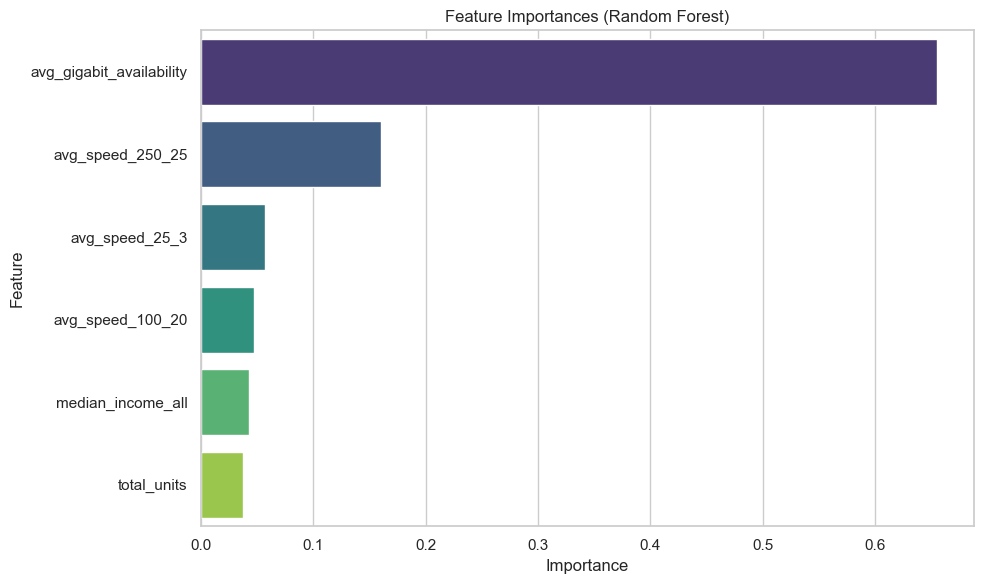

In [352]:
# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()

In [353]:
# Add predicted values to test set
X_test_with_preds = X_test.copy()
X_test_with_preds['actual'] = y_test
X_test_with_preds['predicted'] = y_pred

In [354]:
# Re-attach county metadata (e.g., name and FIPS)
# First, merge with the original model_df to get county_name
X_test_with_info = X_test_with_preds.merge(
    model_df[['geography_id', 'county_name']],
    left_index=True,
    right_index=True,
    how='left'
)

In [355]:
X_test_with_info.head(10)  # view top 10 predicted counties

,median_income_all,total_units,avg_gigabit_availability,avg_speed_250_25,avg_speed_100_20,avg_speed_25_3,actual,predicted,geography_id,county_name
506,10276.0,1268640,0.145212,0.294805,0.498237,0.620038,1,1,13257,"Stephens County, GA"
2513,11001.0,1294830,0.211200,0.244687,0.416130,0.511247,1,1,47185,"White County, TN"
354,67820.0,8653050,0.106748,0.364472,0.560324,0.682843,1,1,12085,"Martin County, FL"
1080,1506.0,208530,0.397583,0.397583,0.541936,0.611567,1,1,21189,"Owsley County, KY"
2389,740.0,144270,0.267467,0.267467,0.470252,0.583409,1,1,46071,"Jackson County, SD"
1642,382.0,46530,0.049936,0.049936,0.243548,0.414247,1,1,30103,"Treasure County, MT"
2706,55758.0,6172920,0.343441,0.393200,0.644757,0.774571,1,1,48381,"Randall County, TX"
2776,6714.0,1131030,0.198687,0.205883,0.374788,0.474479,1,1,49013,"Duchesne County, UT"
2362,496.0,73080,0.397955,0.397955,0.532301,0.600045,1,1,46017,"Buffalo County, SD"
1741,847378.0,93257550,0.325921,0.399963,0.551332,0.688250,1,1,32003,"Clark County, NV"


To be clear, what we are predicitng here are counties to remain underserved within the next 6-12 months. 

### Model on Full Data set and Sumamrize by States

In [356]:
features = [
    'median_income_all',
    'total_units',
    'avg_gigabit_availability',
    'avg_speed_250_25',
    'avg_speed_100_20',
    'avg_speed_25_3'
]
X = model_df[features]
y = model_df['has_gigabit']

In [357]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

RandomForestClassifier(random_state=42)

In [358]:
# Predict and summarize by state 
model_df['predicted_has_gigabit'] = model.predict(X)
model_df['predicted_underserved'] = (model_df['predicted_has_gigabit'] == 0).astype(int)
model_df['state'] = model_df['county_name'].str.extract(r',\s*(\w{2})$')

In [359]:
# Group by state 
state_summary = (
    model_df[model_df['predicted_underserved'] == 1]
    .groupby('state')
    .size()
    .reset_index(name='underserved_counties')
    .sort_values(by='underserved_counties', ascending=False)
)

In [360]:
print(state_summary)

   state  underserved_counties
0     AK                    12
7     KS                     3
9     MT                     3
10    NE                     3
6     IL                     2
11    NV                     2
12    OK                     2
1     AZ                     1
2     CA                     1
3     GA                     1
4     HI                     1
5     ID                     1
8     KY                     1
13    TX                     1
14    WI                     1
15    WV                     1


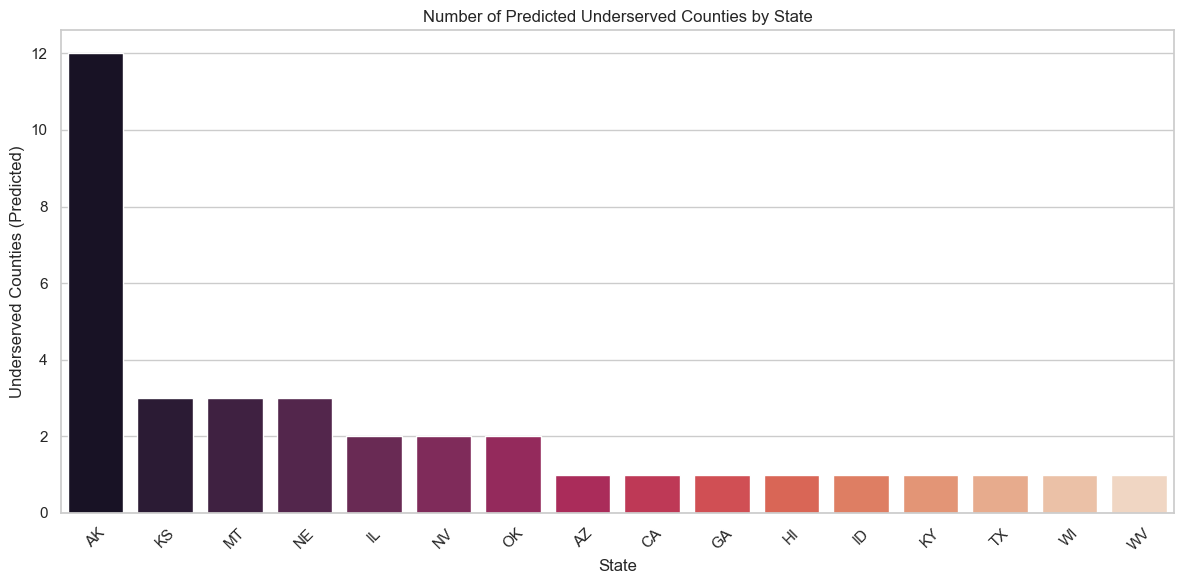

In [361]:
plt.figure(figsize=(12, 6))
sns.barplot(data=state_summary, x='state', y='underserved_counties', palette='rocket')

plt.title('Number of Predicted Underserved Counties by State')
plt.xlabel('State')
plt.ylabel('Underserved Counties (Predicted)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()